# SVM Classifier for Hard Negative Mining Project


In [35]:
# Run some setup code for this notebook.

import random
import numpy as np
from utils.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

# This is to make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# So the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## CIFAR-10 Data Loading and Preprocessing

We'll load the CIFAR-10 data and begin splitting data into train, val, dev and test

In [36]:
cifar10_dir = 'utils/datasets/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

In [37]:
num_training = 49000
num_validation = 1000
num_test = 1000
num_dev = 500

# Val Set
mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

# Train Set
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

# Dev set
mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

# Test set
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

#Sanity Check
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000,)


In [38]:
# Flatten and convert data into rows as part of out preprocess
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))

# Sanity
print('Training data shape: ', X_train.shape)
print('Validation data shape: ', X_val.shape)
print('Test data shape: ', X_test.shape)
print('dev data shape: ', X_dev.shape)

Training data shape:  (49000, 3072)
Validation data shape:  (1000, 3072)
Test data shape:  (1000, 3072)
dev data shape:  (500, 3072)


In [39]:
# Normalizing
mean_image = np.mean(X_train, axis=0)

X_train -= mean_image
X_val -= mean_image
X_test -= mean_image
X_dev -= mean_image

In [40]:
# Add bias
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])

print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)

(49000, 3073) (1000, 3073) (1000, 3073) (500, 3073)


## SVM Classifier

In [41]:
from utils.classifiers.linear_svm import svm_loss_naive
import time

# generate a random SVM weight matrix of small numbers
W = np.random.randn(3073, 10) * 0.0001 

loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.000005)
print('loss: %f' % (loss, ))

loss: 9.273495



# SVM Vectorized Loss Function 

In [30]:
from utils.classifiers.linear_svm import svm_loss_vectorized
import time

tic = time.time()
loss_vectorized, _ = svm_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))

Vectorized loss: 8.533471e+00 computed in 0.011840s


In [31]:
tic = time.time()
_, grad_naive = svm_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Naive loss and gradient: computed in %fs' % (toc - tic))

tic = time.time()
_, grad_vectorized = svm_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Vectorized loss and gradient: computed in %fs' % (toc - tic))

difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('difference: %f' % difference)

Naive loss and gradient: computed in 0.103074s
Vectorized loss and gradient: computed in 0.003713s
difference: 0.000000


### Stochastic Gradient Descent

Ready to compute SGD to minimize the loss.

In [32]:
from utils.classifiers import LinearSVM
svm = LinearSVM()
tic = time.time()
loss_hist = svm.train(X_train, y_train, learning_rate=1e-7, reg=2.5e4,
                      num_iters=1500, verbose=True)
toc = time.time()
print('That took %fs' % (toc - tic))

iteration 0 / 1500: loss 776.028930
iteration 100 / 1500: loss 283.770735
iteration 200 / 1500: loss 106.981858
iteration 300 / 1500: loss 41.998445
iteration 400 / 1500: loss 18.784402
iteration 500 / 1500: loss 10.028673
iteration 600 / 1500: loss 7.360562
iteration 700 / 1500: loss 6.214453
iteration 800 / 1500: loss 5.607975
iteration 900 / 1500: loss 5.419846
iteration 1000 / 1500: loss 5.748161
iteration 1100 / 1500: loss 5.360948
iteration 1200 / 1500: loss 5.024000
iteration 1300 / 1500: loss 5.400061
iteration 1400 / 1500: loss 5.419132
That took 11.771012s


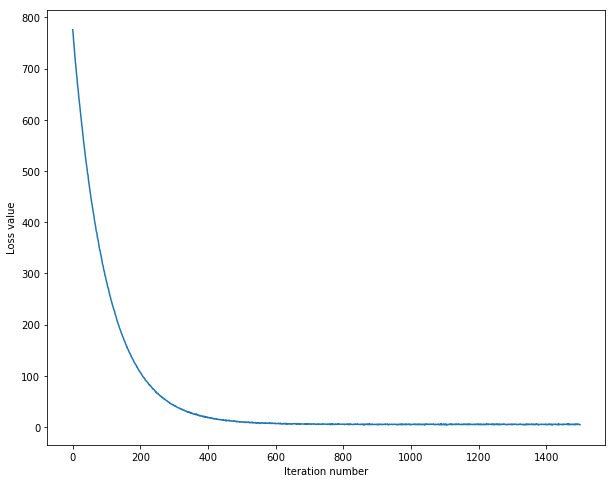

In [33]:
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

In [34]:
# Evaluate the performance on both the training and validation set
y_train_pred = svm.predict(X_train)
print('training accuracy: %f' % (np.mean(y_train == y_train_pred), ))
y_val_pred = svm.predict(X_val)
print('validation accuracy: %f' % (np.mean(y_val == y_val_pred), ))
y_test_pred = svm.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print('linear SVM on raw pixels final test set accuracy: %f' % test_accuracy)

training accuracy: 0.367224
validation accuracy: 0.371000
linear SVM on raw pixels final test set accuracy: 0.371000
